In [2]:
# Packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
# import keras
# import rpy
import datetime
# from sklearn.cluster import KMeans
# from scipy.cluster.vq import kmeans,vq
from scipy import stats
import scipy.cluster.hierarchy as hac
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from io import StringIO
import pandas_profiling
from matplotlib import rcParams


In [3]:
df = pd.read_csv('listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,288,46,0.39,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365,0,NaN,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,212,274,4.64,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0,9,0.10,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1,127,75,0.60,200


In [5]:
# pandas_profiling.ProfileReport(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price'],
      dtype='object')

In [12]:
# renaming some of the columns 
df.columns = ['apt_id', 'apt_name', 'host_id', 'host_name', 'borough',
       'neighborhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price']

In [13]:
df.columns

Index(['apt_id', 'apt_name', 'host_id', 'host_name', 'borough', 'neighborhood',
       'latitude', 'longitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'price'],
      dtype='object')

### Reviewing the data

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 15 columns):
apt_id                            48864 non-null int64
apt_name                          48848 non-null object
host_id                           48864 non-null int64
host_name                         48846 non-null object
borough                           48864 non-null object
neighborhood                      48864 non-null object
latitude                          48864 non-null float64
longitude                         48864 non-null float64
room_type                         48864 non-null object
minimum_nights                    48864 non-null int64
calculated_host_listings_count    48864 non-null int64
availability_365                  48864 non-null int64
number_of_reviews                 48864 non-null int64
reviews_per_month                 38733 non-null float64
price                             48864 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 5

In [117]:
pd.set_option('display.max_colwidth', 0)
df[['borough','neighborhood','room_type','minimum_nights','calculated_host_listings_count',
   'availability_365','number_of_reviews','reviews_per_month']].agg(['unique']).transpose()

,unique
borough,"[Manhattan, Brooklyn, Queens, Staten Island, Bronx]"
neighborhood,"[Midtown, Harlem, Clinton Hill, East Harlem, Murray Hill, Bedford-Stuyvesant, Hell's Kitchen, Upper West Side, East Village, Chinatown, South Slope, West Village, Williamsburg, Fort Greene, Chelsea, Crown Heights, Park Slope, Windsor Terrace, Inwood, Greenpoint, Bushwick, Flatbush, Lower East Side, Prospect-Lefferts Gardens, Long Island City, Kips Bay, SoHo, Upper East Side, Red Hook, Prospect Heights, Washington Heights, Woodside, Brooklyn Heights, Carroll Gardens, Gowanus, Flatlands, Cobble Hill, Flushing, Boerum Hill, Sunnyside, DUMBO, St. George, Highbridge, Financial District, Ridgewood, Morningside Heights, Jamaica, Middle Village, NoHo, Ditmars Steinway, Flatiron District, Roosevelt Island, Greenwich Village, Little Italy, Tompkinsville, Astoria, Kensington, Clason Point, Eastchester, Kingsbridge, Two Bridges, Queens Village, Rockaway Beach, Forest Hills, East Flatbush, Nolita, Woodlawn, University Heights, Gravesend, Gramercy, Allerton, East New York, Theater District, Concourse Village, Sheepshead Bay, Emerson Hill, Fort Hamilton, Bensonhurst, Tribeca, Shore Acres, Sunset Park, Concourse, Vinegar Hill, Elmhurst, Brighton Beach, Jackson Heights, Cypress Hills, St. Albans, Arrochar, Rego Park, Wakefield, Clifton, Bay Ridge, Graniteville, Spuyten Duyvil, Stapleton, Briarwood, Ozone Park, Columbia St, Mott Haven, ...]"
room_type,"[Entire home/apt, Private room, Shared room]"
minimum_nights,"[1, 3, 10, 45, 2, 30, 5, 4, 90, 7, 14, 29, 180, 12, 31, 6, 15, 8, 26, 28, 200, 9, 17, 21, 11, 13, 35, 27, 20, 40, 44, 65, 55, 60, 120, 365, 122, 19, 25, 18, 240, 88, 115, 150, 370, 16, 80, 181, 265, 300, 185, 360, 179, 56, 50, 70, 32, 1000, 250, 24, 270, 22, 75, 62, 1250, 364, 198, 100, 500, 43, 210, 221, 23, 59, 480, 53, 99, 160, 47, 999, 186, 366, 68, 130, 91, 85, 93, 87, 110, 299, 89, 175, 98, 133, 354, 42, 33, 37, 225, 400, ...]"
calculated_host_listings_count,"[2, 1, 4, 3, 6, 5, 7, 13, 28, 11, 8, 9, 52, 18, 15, 19, 39, 10, 27, 29, 12, 21, 96, 14, 34, 43, 119, 37, 49, 31, 92, 81, 33, 32, 50, 20, 25, 239, 36, 16, 117, 17, 65, 343, 24, 22]"
availability_365,"[288, 365, 212, 0, 127, 239, 322, 1, 23, 324, 4, 305, 5, 22, 275, 117, 290, 251, 89, 104, 42, 341, 252, 309, 334, 291, 15, 24, 27, 344, 339, 310, 303, 124, 245, 211, 269, 254, 151, 261, 287, 215, 244, 301, 336, 180, 280, 179, 218, 286, 320, 219, 92, 329, 342, 145, 353, 316, 243, 259, 237, 149, 289, 228, 317, 71, 8, 284, 304, 299, 223, 296, 186, 29, 198, 340, 108, 248, 147, 9, 205, 268, 193, 281, 270, 285, 20, 326, 242, 230, 274, 195, 3, 246, 178, 292, 185, 363, 40, 197, ...]"
number_of_reviews,"[46, 0, 274, 9, 75, 49, 434, 118, 94, 161, 53, 190, 167, 27, 154, 200, 268, 59, 131, 73, 92, 20, 58, 29, 244, 201, 74, 169, 57, 233, 216, 248, 15, 25, 82, 99, 11, 251, 61, 12, 135, 114, 76, 84, 338, 19, 107, 290, 138, 21, 43, 5, 66, 143, 192, 4, 347, 149, 108, 50, 23, 109, 146, 62, 55, 72, 17, 198, 2, 177, 24, 171, 16, 22, 168, 119, 1, 30, 139, 236, 68, 88, 468, 7, 38, 326, 116, 356, 14, 36, 63, 155, 262, 194, 33, 427, 231, 3, 10, 126, ...]"
reviews_per_month,"[0.39, nan, 4.64, 0.1, 0.6, 3.48, 0.98, 0.74, 1.33, 0.42, 1.5, 0.22, 1.24, 1.72, 2.17, 4.59, 0.07, 1.09, 0.63, 0.76, 1.35, 0.48, 0.24, 2.04, 1.46, 1.67, 2.35, 0.65, 1.41, 1.96, 1.82, 2.08, 0.23, 0.7, 0.85, 0.47, 2.25, 0.52, 0.11, 1.16, 1.02, 0.71, 2.88, 0.21, 0.91, 0.83, 0.17, 2.48, 1.18, 0.29, 0.38, 0.12, 0.57, 1.32, 1.64, 0.16, 4.78, 1.39, 1.27, 0.44, 0.43, 1.55, 0.95, 0.19, 1.52, 1.65, 0.54, 0.5, 0.53, 1.75, 0.05, 0.27, 3.44, 0.2, 0.31, 1.56, 1.05, 0.72, 1.22, 0.81, 2.1, 3.02, 0.79, 1.43, 1.6, 3.01, 4.19, 0.06, 3.0, 3.19, 0.13, 0.08, 0.33, 0.68, 1.86, 0.3, 0.45, 0.02, 3.86, 2.11, ...]"


In [ ]:
# pd.scatter_matrix(df,figsize=(20,20))

In [110]:
for col in df:
    if(df[col].isnull().any()):
        print(col)

apt_name
host_name
reviews_per_month


In [ ]:
# not every apartment has a description in apt_name. Not a big deal for now
# same for other columns

In [ ]:
# df.loc[df['apt_name']=='#NAME?']
# and
# df.loc[df['apt_name']=='']

In [ ]:
# df.groupby(['job']).apply(lambda x: (x.groupby('source')
#                                       .sum()
#                                       .sort_values('count', ascending=False))
#                                      .head(3))

In [58]:
# hosts and apts: now many apts host rent out?
df.groupby(['host_id','host_name'])[['apt_id']].count().sort_values(['apt_id'], ascending = False).head(10)
# Some hosts are huge

,,apt_id
host_id,host_name,
219517861,Sonder (NYC),343
107434423,Blueground,239
30283594,Kara,119
137358866,Kaz,117
16098958,Jeremy & Laura,96
12243051,Sonder,96
61391963,Corporate Housing,92
22541573,Ken,81
200380610,Pranjal,65


In [ ]:
df.groupby(['host_id','host_name'])[['apt_id']].count().sort_values(['apt_id'], ascending = False)

In [ ]:
# charting it take forever
# plt.hist(df.groupby(['host_id','host_name'])[['apt_id']].count().sort_values(['apt_id'], ascending = False))

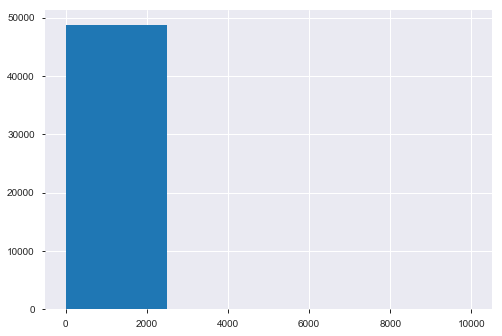

In [128]:
# histogram of prices
df['price'].hist(bins = 4)

In [ ]:
# map by borough
# in Tableau

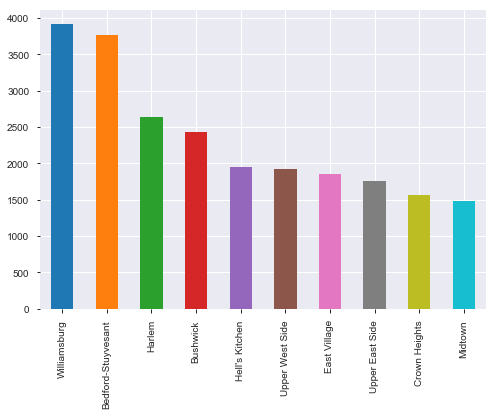

In [69]:
# 10 most popular neighborhoods
df['neighborhood'].value_counts().head(10).plot(kind='bar')

In [92]:
# top 10 neighborhoods by availability
df.groupby(['neighborhood'])['apt_id'].count().sort_values(ascending = False).head(10).index
# df.groupby(['neighborhood'])['apt_id'].count().sort_values(ascending = False).head(10)[:10]

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Hell's Kitchen', 'Upper West Side', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object', name='neighborhood')

In [94]:
df1 = df[df['neighborhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Hell\'s Kitchen', 'Upper West Side', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'])]

(-100, 1500)

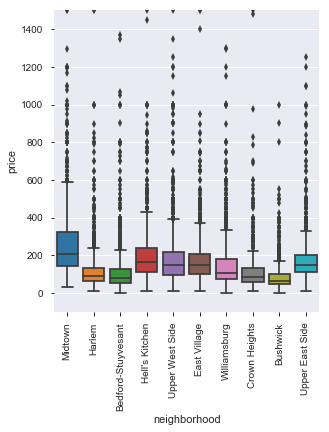

In [108]:
g = sns.catplot(x="neighborhood", y="price", kind="box", data=df1)
g.set_xticklabels(rotation=90)
plt.ylim(-100, 1500)

TypeError: invalid type comparison

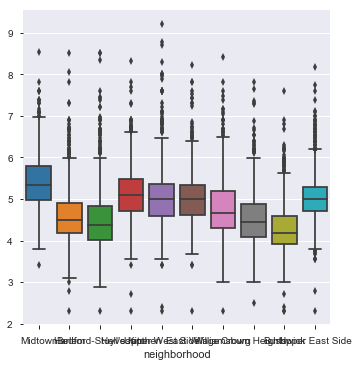

In [118]:
g = sns.catplot(x="neighborhood", y=np.log(df['price']), kind="box", data=df1)
g.set_xticklabels(rotation=90)
# plt.ylim(-100, 1500)

In [123]:
# df['price'].shape
np.log(df['price']).shape

(48864,)

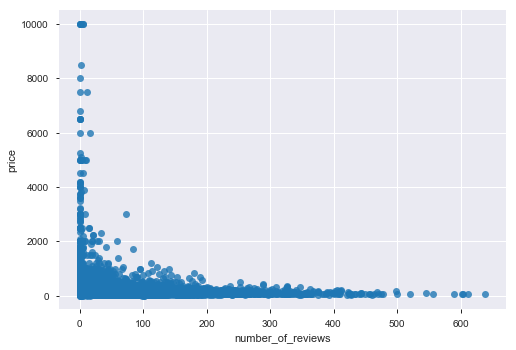

In [125]:
# number of reviews
sns.regplot(x=df['number_of_reviews'],y=df['price'],fit_reg=False)

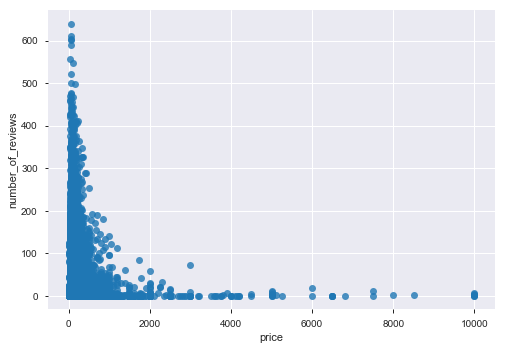

In [126]:
# Do popularity (by number of reviews) and prices correlate?
sns.regplot(x=df['price'],y=df['number_of_reviews'],logx = True, fit_reg=True)

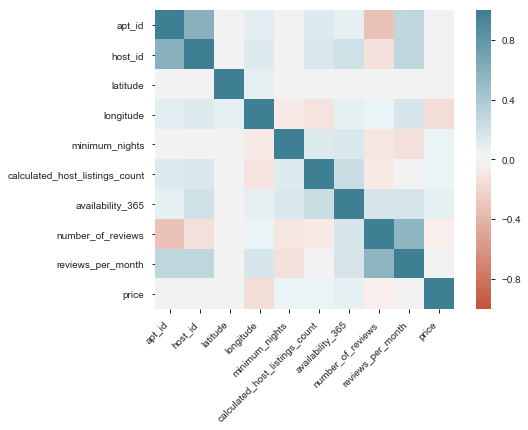

In [114]:
# correlations b/w variables

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);